## Import Necessary Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [3]:
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban']
fraud_data=pd.get_dummies(data=fraud_data,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)
fraud_data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [6]:
fraud_data['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [7]:
#Creating new column 'TaxIncm' and dividing 'Taxable.Income' column on the basis of bins=[10002,30000,99620] for Risky and Good.
fraud_data['Taxincm'] = pd.cut(fraud_data['Taxable.Income'],bins=[10003,30000,99619],labels=['Risky','Good'])
fraud_data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxincm
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


### Considering Taxable_Income <= 30000 as “Risky=0” and others as “Good=1”

In [8]:
#Creating dummy variable for feature ['Taxincm']
fraud_data=pd.get_dummies(fraud_data,columns=['Taxincm'],drop_first=True)
fraud_data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxincm_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [9]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Taxable.Income          600 non-null    int64
 1   City.Population         600 non-null    int64
 2   Work.Experience         600 non-null    int64
 3   Undergrad_YES           600 non-null    uint8
 4   Marital.Status_Married  600 non-null    uint8
 5   Marital.Status_Single   600 non-null    uint8
 6   Urban_YES               600 non-null    uint8
 7   Taxincm_Good            600 non-null    uint8
dtypes: int64(3), uint8(5)
memory usage: 17.1 KB


### Now, All the features are of Numerical Datatypes.

## Visualization with pairplot:

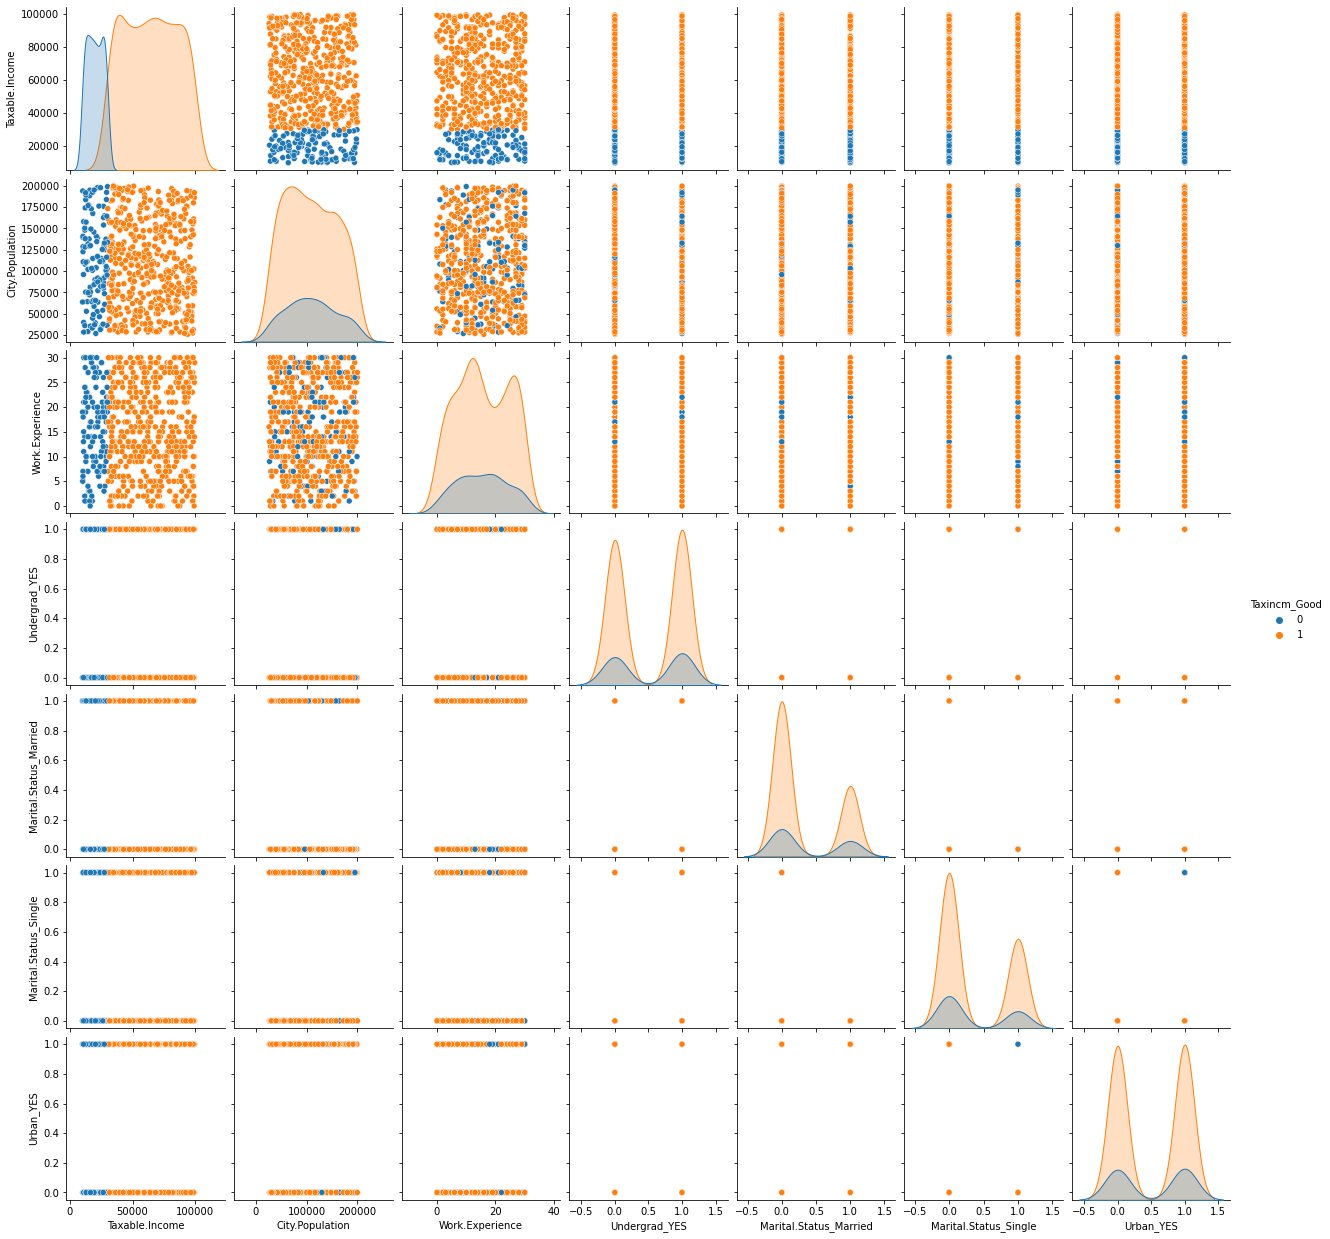

In [10]:
sns.pairplot(data=fraud_data, hue = 'Taxincm_Good')

In [11]:
#Normalizing Data:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
fraud_data_norm = norm_func(fraud_data.iloc[:,1:])
fraud_data_norm

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxincm_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


## Building Model:

In [13]:
X = fraud_data_norm.iloc[:,:6]
y = fraud_data_norm.iloc[:,6]

In [14]:
X

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [15]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: Taxincm_Good, Length: 600, dtype: float64

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12,shuffle=True)

In [17]:
X_train.shape,y_train.shape       #training data

((480, 6), (480,))

In [18]:
X_test.shape,y_test.shape          #testing data

((120, 6), (120,))

# Model Training Using Random Forest:

### Using Entropy:

In [19]:
rf_model=RandomForestClassifier(n_estimators=15,max_depth=3,criterion='entropy')
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=15)

In [20]:
y_pred_test=rf_model.predict(X_test)
y_pred_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [21]:
pd.Series(y_pred_test).value_counts()

1.0    120
dtype: int64

In [22]:
pd.crosstab(y_test,y_pred_test)

col_0,1.0
Taxincm_Good,
0.0,13
1.0,107


In [23]:
accuracy_score(y_test,y_pred_test)

0.8916666666666667

In [24]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        13
         1.0       0.89      1.00      0.94       107

    accuracy                           0.89       120
   macro avg       0.45      0.50      0.47       120
weighted avg       0.80      0.89      0.84       120



### Using Gini Index:

In [25]:
rf_model2=RandomForestClassifier(n_estimators=15,max_depth=3,criterion='gini')
rf_model2.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=15)

In [26]:
y_pred_test2=rf_model2.predict(X_test)
y_pred_test2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [27]:
pd.Series(y_pred_test2).value_counts()

1.0    120
dtype: int64

In [28]:
pd.crosstab(y_test,y_pred_test2)

col_0,1.0
Taxincm_Good,
0.0,13
1.0,107


In [29]:
accuracy_score(y_test,y_pred_test2)

0.8916666666666667

In [30]:
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        13
         1.0       0.89      1.00      0.94       107

    accuracy                           0.89       120
   macro avg       0.45      0.50      0.47       120
weighted avg       0.80      0.89      0.84       120



## Using GridSearch CV:

In [38]:
grid_search_cv = GridSearchCV(estimator  = rf_model,
                             param_grid = {'criterion':['gini','entropy'],
                                           'max_depth':[3,4,5,6,7,8,9]} ,
                             cv=5)
grid_search_cv.fit(X,y)

print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'gini', 'max_depth': 3}
0.7933333333333332


In [32]:
rf_model3=RandomForestClassifier(n_estimators=15,max_depth=3,criterion='gini')
rf_model3.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=15)

In [33]:
y_pred_test3=rf_model3.predict(X_test)
y_pred_test3

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [34]:
pd.Series(y_pred_test3).value_counts()

1.0    120
dtype: int64

In [35]:
pd.crosstab(y_test,y_pred_test3)

col_0,1.0
Taxincm_Good,
0.0,13
1.0,107


In [36]:
accuracy_score(y_test,y_pred_test3)

0.8916666666666667

In [37]:
print(classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        13
         1.0       0.89      1.00      0.94       107

    accuracy                           0.89       120
   macro avg       0.45      0.50      0.47       120
weighted avg       0.80      0.89      0.84       120

